# Simulation Manager

In this example notebook, we will use the simulation manager tool available in NeuralPlayground. The purpose of this tool is the following:
- Run multiple instantiations of model and environments, saved in an organized manner, logging trained agents, error logs, etc…
- Keep track of the status of each run.
- Access to a default set of simulations that can be easily modified or augmented with new models and environments. 
- The results from the simulations can be used with the comparison tool, for quick visualization of results.


## SingleSim
We will start by describing the class that manages single agent-arena pairs, called SingleSim. Objects from this class take the simulation parameters, and it can run the simulation and save the results on the path given by the user, taking care of saving trained agents, simulation parameters, run status, and error logs. 

First, let's import SR model, a Simple2D arena, and a training loop function that describes the interaction of the agent with the arena.

In [1]:
from neuralplayground.agents import Stachenfeld2018
from neuralplayground.arenas import Simple2D
from neuralplayground.backend import episode_based_training_loop

from neuralplayground.backend import SingleSim

Now, let's define the parameters of each element we imported. The SingleSim objects takes the following arguments

In [2]:
simulation_id = "SR_custom_sim"
agent_class = Stachenfeld2018
env_class = Simple2D
training_loop = episode_based_training_loop

# Specific parameters for agents, environments and training loop can be written as dictionaries
agent_params = {"discount": 0.99,
                "threshold": 1e-6,
                "lr_td": 1e-2,
                "state_density": 1,
                "room_width": 12,
                "room_depth": 12,
                "twoD": True}

env_params = {"arena_x_limits": [-6, 6],
              "arena_y_limits": [-6, 6],
              "env_name": "env_example",
              "time_step_size": 0.2,
              "agent_step_size": 1}

# Short training just for demonstration
training_loop_params = {"t_episode": 100, "n_episode": 10}

We initialize the SingleSim object

In [3]:
sim = SingleSim(simulation_id = simulation_id,
                agent_class = agent_class,
                agent_params = agent_params,
                env_class = env_class,
                env_params = env_params,
                training_loop = training_loop,
                training_loop_params = training_loop_params)

In [4]:
print(sim)

Simulation: SR_custom_sim
Agent: <class 'neuralplayground.agents.stachenfeld_2018.Stachenfeld2018'>
Agent params: {'discount': 0.99, 'threshold': 1e-06, 'lr_td': 0.01, 'state_density': 1, 'room_width': 12, 'room_depth': 12, 'twoD': True}
Environment: <class 'neuralplayground.arenas.simple2d.Simple2D'>
Environment params: {'arena_x_limits': [-6, 6], 'arena_y_limits': [-6, 6], 'env_name': 'env_example', 'time_step_size': 0.2, 'agent_step_size': 1}
Training loop: <function episode_based_training_loop at 0x7fe155d96520>
Training loop params: {'t_episode': 100, 'n_episode': 10}



In [5]:
sim.run_sim()

When running a simulation, the results will be saved in ```results_sim``` in the working directory by default. Every simulation result folder should contain:
agent: Trained agent object.
arena: Arena object used to train the agent.
training_hist.dict: A dictionary with variables returned by the train loop on each iteration.
param.dict: Simulation parameters.
run.log: Any outputs printed by agents, environments, or training loop during training.
error.log: Same as run.log but with errors.
state.log: Used with keywords to keep track of the running status of the simulation.

So far, when the user runs the simulation calling ```run_sim```, the run will stop if there is an error in the code and will be printed directly on the default output. The logs were made for the simulation manager described later.

You can load the results of the specific run using ```load_results``` method, getting the trained agent, environment and training history.


In [6]:
trained_agent, env, training_hist = sim.load_results()

In [7]:
sim.show_logs()

/home/rodrigo/anaconda3/envs/NPG-dev/lib/python3.11/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float64
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")



<Axes: title={'center': 'position'}, xlabel='width', ylabel='depth'>

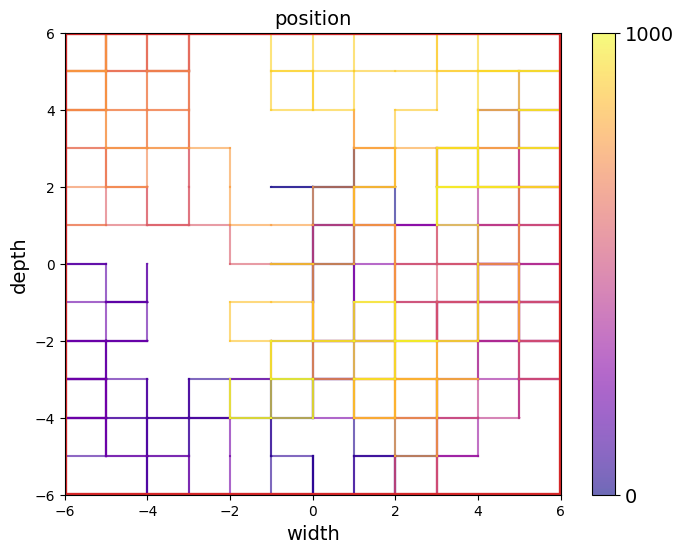

In [8]:
env.plot_trajectory()

It is also possible to load the parameters of an existing simulation and run it again with the same or different set of parameters. For example, we can create an empty SingleSim object, load the parameters of the existing one, change the parameters, and run the simulation.

In [9]:
sim2 = SingleSim()

In [10]:
sim2.load_params("results_sim")

In [11]:
print(sim2)

Simulation: SR_custom_sim
Agent: <class 'neuralplayground.agents.stachenfeld_2018.Stachenfeld2018'>
Agent params: {'discount': 0.99, 'threshold': 1e-06, 'lr_td': 0.01, 'state_density': 1, 'room_width': 12, 'room_depth': 12, 'twoD': True}
Environment: <class 'neuralplayground.arenas.simple2d.Simple2D'>
Environment params: {'arena_x_limits': [-6, 6], 'arena_y_limits': [-6, 6], 'env_name': 'env_example', 'time_step_size': 0.2, 'agent_step_size': 1}
Training loop: <function episode_based_training_loop at 0x7fe155d96520>
Training loop params: {'t_episode': 100, 'n_episode': 10}



In [12]:
new_params = sim2.agent_params  # Here we take the agent parameters
new_params["lr_td"] = 0.001   # Change the learning rate
sim2.agent_params = new_params  # Set the parameters with the new learning rate
print(sim2)
sim2.run_sim("small_lr_sim")  # Run with all parameters equal except for the learning rate

Simulation: SR_custom_sim
Agent: <class 'neuralplayground.agents.stachenfeld_2018.Stachenfeld2018'>
Agent params: {'discount': 0.99, 'threshold': 1e-06, 'lr_td': 0.001, 'state_density': 1, 'room_width': 12, 'room_depth': 12, 'twoD': True}
Environment: <class 'neuralplayground.arenas.simple2d.Simple2D'>
Environment params: {'arena_x_limits': [-6, 6], 'arena_y_limits': [-6, 6], 'env_name': 'env_example', 'time_step_size': 0.2, 'agent_step_size': 1}
Training loop: <function episode_based_training_loop at 0x7fe155d96520>
Training loop params: {'t_episode': 100, 'n_episode': 10}



## Simulation Manager